In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os

In [2]:
train_dir = r"C:\Users\anany\OneDrive\Desktop\Research Paper Publish\MRI\Training"
save_path = r"C:\Users\anany\OneDrive\Desktop\Research Paper Publish\MRI"

In [3]:
img_height, img_width = 224, 224
batch_size = 32
num_classes = 4 

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


In [6]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
model.fit(train_data, validation_data=val_data, epochs=5)

Epoch 1/5
143/143 [==============================] - 488s 3s/step - loss: 0.8298 - accuracy: 0.6583 - val_loss: 0.9114 - val_accuracy: 0.6757
Epoch 2/5
143/143 [==============================] - 397s 3s/step - loss: 0.4923 - accuracy: 0.8175 - val_loss: 0.7916 - val_accuracy: 0.7301
Epoch 3/5
143/143 [==============================] - 337s 2s/step - loss: 0.3911 - accuracy: 0.8585 - val_loss: 0.7617 - val_accuracy: 0.7432
Epoch 4/5
143/143 [==============================] - 613s 4s/step - loss: 0.3289 - accuracy: 0.8821 - val_loss: 0.6947 - val_accuracy: 0.7546
Epoch 5/5
143/143 [==============================] - 301s 2s/step - loss: 0.2887 - accuracy: 0.8943 - val_loss: 0.8084 - val_accuracy: 0.7660


In [8]:
model.save(save_path)

INFO:tensorflow:Assets written to: C:\Users\anany\OneDrive\Desktop\Research Paper Publish\MRI\assets


INFO:tensorflow:Assets written to: C:\Users\anany\OneDrive\Desktop\Research Paper Publish\MRI\assets


In [9]:
print(f"\n✅ Model saved at: {save_path}")


✅ Model saved at: C:\Users\anany\OneDrive\Desktop\Research Paper Publish\MRI


In [19]:
model.save(r"C:\Users\anany\OneDrive\Desktop\Research Paper Publish\MRI\my_model")


INFO:tensorflow:Assets written to: C:\Users\anany\OneDrive\Desktop\Research Paper Publish\MRI\my_model\assets


INFO:tensorflow:Assets written to: C:\Users\anany\OneDrive\Desktop\Research Paper Publish\MRI\my_model\assets


In [20]:
from tensorflow.keras.models import load_model

model = load_model(r"C:\Users\anany\OneDrive\Desktop\Research Paper Publish\MRI\my_model")


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score


In [12]:
val_data.reset()
y_pred_probs = model.predict(val_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_data.classes
class_names = list(val_data.class_indices.keys())

36/36 [==============================] - 31s 766ms/step


In [27]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    batch_size=32
)


Epoch 1/10
143/143 [==============================] - 509s 4s/step - loss: 0.2534 - accuracy: 0.9086 - val_loss: 0.6944 - val_accuracy: 0.7730
Epoch 2/10
143/143 [==============================] - 477s 3s/step - loss: 0.2046 - accuracy: 0.9265 - val_loss: 0.7159 - val_accuracy: 0.7713
Epoch 3/10
143/143 [==============================] - 461s 3s/step - loss: 0.1903 - accuracy: 0.9350 - val_loss: 0.8686 - val_accuracy: 0.7853
Epoch 4/10
143/143 [==============================] - 330s 2s/step - loss: 0.1658 - accuracy: 0.9407 - val_loss: 0.7013 - val_accuracy: 0.7739
Epoch 5/10
143/143 [==============================] - 387s 3s/step - loss: 0.1397 - accuracy: 0.9571 - val_loss: 0.8859 - val_accuracy: 0.7835
Epoch 6/10
143/143 [==============================] - 459s 3s/step - loss: 0.1349 - accuracy: 0.9536 - val_loss: 0.7580 - val_accuracy: 0.7826
Epoch 7/10
143/143 [==============================] - 487s 3s/step - loss: 0.1089 - accuracy: 0.9604 - val_loss: 0.8790 - val_accuracy: 0.7800

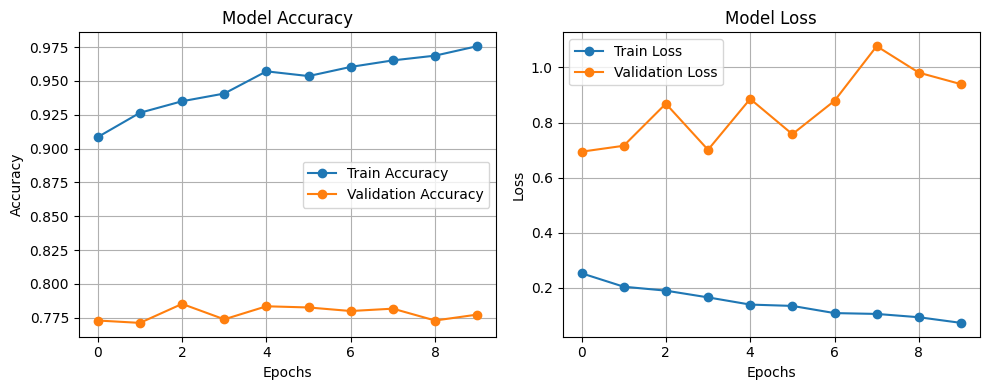

In [28]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


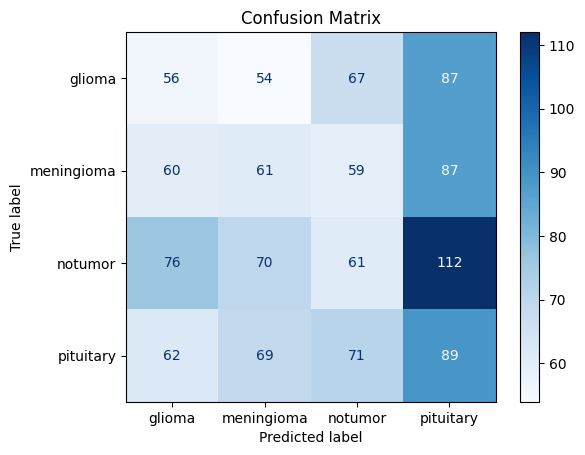

In [13]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [14]:
print("\n📄 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


📄 Classification Report:

              precision    recall  f1-score   support

      glioma       0.22      0.21      0.22       264
  meningioma       0.24      0.23      0.23       267
     notumor       0.24      0.19      0.21       319
   pituitary       0.24      0.31      0.27       291

    accuracy                           0.23      1141
   macro avg       0.23      0.23      0.23      1141
weighted avg       0.23      0.23      0.23      1141



In [15]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"✅ Accuracy:  {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall:    {recall:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")

✅ Accuracy:  0.2340
✅ Precision: 0.2336
✅ Recall:    0.2344
✅ F1 Score:  0.2323



🔍 Testing image for: glioma
1/1 [==============================] - 0s 349ms/step
✅ Predicted Tumor Type: glioma
🔢 Confidence: 81.10%


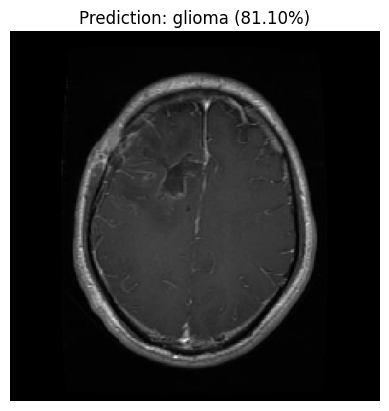


🔍 Testing image for: meningioma
1/1 [==============================] - 0s 63ms/step
✅ Predicted Tumor Type: pituitary
🔢 Confidence: 99.44%


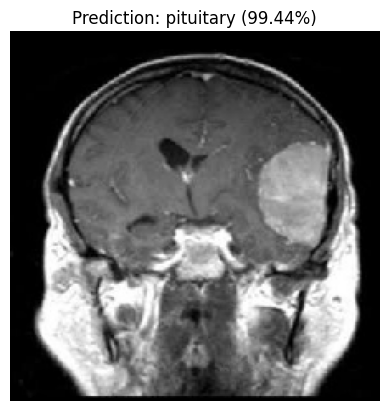


🔍 Testing image for: notumor
1/1 [==============================] - 0s 65ms/step
✅ Predicted Tumor Type: notumor
🔢 Confidence: 99.99%


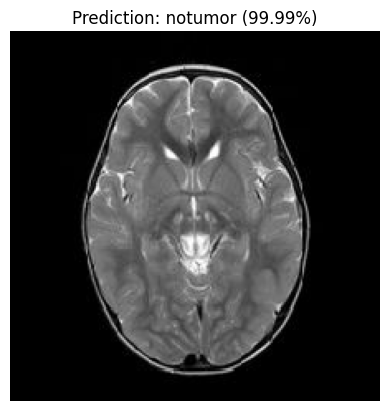


🔍 Testing image for: pituitary
1/1 [==============================] - 0s 64ms/step
✅ Predicted Tumor Type: pituitary
🔢 Confidence: 99.85%


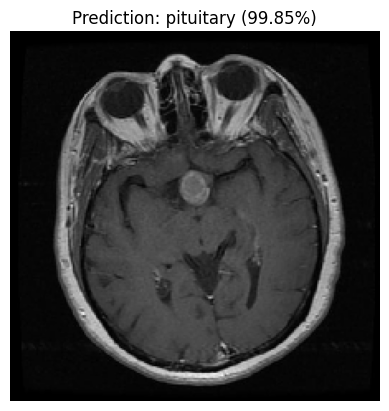

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# --- Helper Function ---
def classify_image(img_path, model, class_names, img_size=(224, 224)):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    confidence = np.max(predictions)
    predicted_class = class_names[np.argmax(predictions)]

    return predicted_class, confidence, predictions[0], img  # also return image for display


# --- Input Sample Path ---
sample_paths = {
    "glioma": r"C:\Users\anany\OneDrive\Desktop\Research Paper Publish\MRI\Testing\glioma\Te-gl_0016.jpg",
    "notumor": r"C:\Users\anany\OneDrive\Desktop\Research Paper Publish\MRI\Testing\notumor\Te-no_0016.jpg",
    "pituitary": r"C:\Users\anany\OneDrive\Desktop\Research Paper Publish\MRI\Testing\pituitary\Te-pi_0015.jpg",
}

# --- Load Model ---
model_path = r"C:\Users\anany\OneDrive\Desktop\Research Paper Publish\MRI\my_model"
model = load_model(model_path)

# --- Define Class Names ---
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# --- Classify and Show ---
for tumor_type, path in sample_paths.items():
    print(f"\n🔍 Testing image for: {tumor_type}")
    predicted_class, confidence, probs, img_display = classify_image(path, model, class_names)

    # Print Prediction
    print(f"✅ Predicted Tumor Type: {predicted_class}")
    print(f"🔢 Confidence: {confidence * 100:.2f}%")

    # Show Image
    plt.imshow(img_display)
    plt.axis("off")
    plt.title(f"Prediction: {predicted_class} ({confidence * 100:.2f}%)")
    plt.show()
